In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# from itertools import starmap
from utils import save_model, save_plots
from CNN_execution import plot_roc_curve, ect_train_validate, report_trained_model, find_numpy_files

/mnt/home/karkinis/.conda/envs/ECT_CNN.cpu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Parameters required to define the model. 
# Will remain same throught the excerise.
 
NUM_EPOCHS = 50 # number of epochs to train the network for; type=int
LEARNING_RATE = 1e-3 # learning rate for training; type=float
# loss function
lossfcn = nn.CrossEntropyLoss()

# Number of workers for dataloader
num_workers = int( os.environ.get('SLURM_CPUS_PER_TASK', default=0) )

# device
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
num_dirs = 4
num_thresh = 4

data_dir = '../../data'
classes = [
    i
        for i in os.listdir(data_dir)
        if os.path.isdir(os.path.join(data_dir, i))
]
class_items = {
    i: find_numpy_files(os.path.join(data_dir, i))
        for i in classes
}
class_items.pop('Transect')
class_items.pop('Leafsnap')

num_data_to_use_for_training = min( [len(class_items[i]) for i in class_items] )
# num_data_to_use_for_training = 30
print(f"Using {num_data_to_use_for_training} data for training")

class_items = {
    class_name: np.random.choice( file_paths, num_data_to_use_for_training, replace=False)
        for class_name, file_paths in class_items.items()
}

Using 865 data for training


In [4]:
help(ect_train_validate)

# trained_outputs = ect_train_validate(
#     num_dirs=num_dirs,
#     num_thresh=num_thresh,
#     input_path=class_items,
#     output_ect_path='example_data/outputs',
#     output_model_path='example_data/best_model.pth',
#     log_level='INFO'
# )

Help on function ect_train_validate in module CNN_execution:

ect_train_validate(num_dirs, num_thresh, input_path=None, output_ect_path='example_data/ect_output', in_memory=False, output_model_path='outputs/best_model.pth', num_epochs=50, learning_rate=0.001, lossfcn=CrossEntropyLoss(), batch_size=4, valid_split=0.2, num_workers=0, device=device(type='cpu'), recompute_ect=True, log_level='INFO')
    Function to train and validate the CNN model using the ECT dataset.
    Usage:
        ect_train_validate(
            num_dirs, num_thresh, input_path=None,
            output_ect_path="example_data/ect_output", in_memory=False,
            output_model_path="outputs/best_model.pth",
            num_epochs=50, learning_rate=1e-3, lossfcn=nn.CrossEntropyLoss(),
            batch_size=4, valid_split=0.2, num_workers=0,
            device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
            recompute_ect=True, log_level='INFO'
        )
    Parameters:
        num_dirs: i

In [5]:
help(save_model)
# save_model(
#     epochs=trained_outputs["num_epochs"],
#     model=trained_outputs["model"],
#     optimizer=trained_outputs["optimizer"],
#     criterion=trained_outputs["lossfcn"],
#     output_model_path='example_data/best_model.pth',
# )


Help on function save_model in module utils:

save_model(epochs, model, optimizer, criterion, output_model_path='outputs/best_model.pth')
    Function to save the trained model.
    Adapted from https://debuggercafe.com/saving-and-loading-the-best-model-in-pytorch/



In [6]:
help(save_plots)
# loss, acc = plt.figure(figsize=(9,5)).subplots(1, 2)
# save_plots(
#     train_acc= trained_outputs["train_acc"],
#     valid_acc= trained_outputs["valid_acc"],
#     train_loss= trained_outputs["train_loss"],
#     valid_loss= trained_outputs["valid_loss"],
#     loss=loss,
#     accuracy=acc,
#     accuracy_path='example_data/accuracy.png',
#     loss_path='example_data/loss.png'
# )


Help on function save_plots in module utils:

save_plots(train_acc, valid_acc, train_loss, valid_loss, accuracy=None, loss=None, fig_size=(10, 7), dpi=300, accuracy_path='outputs/accuracy.png', loss_path='outputs/loss.png')
    Function to save the loss and accuracy plots.
    Usage:
        save_plots(
            train_acc, valid_acc, train_loss,valid_loss,
            accuracy = None, loss = None,
            fig_size=(10, 7), dpi=300,
            accuracy_path = 'outputs/accuracy.png', loss_path = 'outputs/loss.png'
        )
    Parameters:
        train_acc: list of training accuracy values
        valid_acc: list of validation accuracy values
        train_loss: list of training loss values
        valid_loss: list of validation loss values
        accuracy: matplotlib axis to plot accuracy. If None, a new figure is created.
        loss: matplotlib axis to plot loss. If None, a new figure is created.
        fig_size: tuple, size of the figure. Default is (10, 7)
        dpi: i

In [7]:
help(report_trained_model)
# report_trained_model(
#     num_dirs=num_dirs,
#     num_thresh=num_thresh,
#     train_dataset=trained_outputs["train_dataset"],
#     train_loader=trained_outputs["train_loader"],
#     test_loader=trained_outputs["test_loader"],
#     test_dataset=trained_outputs["test_dataset"],
#     model_path='example_data/best_model.pth',
#     output_cf='example_data/confusion_matrix.png',
#     output_report='example_data/accuracy.txt',
#     log_level='INFO'
# )

Help on function report_trained_model in module CNN_execution:

report_trained_model(num_dirs, num_thresh, train_dataset, train_loader, test_loader, test_dataset, device=device(type='cpu'), model_path='outputs/best_model.pth', ax=None, output_cf='outputs/confusion_matrix.png', output_report='outputs/outputCLFreport.csv', log_level='INFO')
    Function to report the trained model.
    Usage:
        report_trained_model(
            num_dirs, num_thresh,
            train_dataset, train_loader, test_loader, test_dataset,
            device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
            model_path= 'outputs/best_model.pth',
            output_cf='outputs/confusion_matrix.png',
            output_report='outputs/outputCLFreport.csv',
            log_level='INFO'
        )
    Parameters:
        num_dirs: int, number of directions for ECT calculation.
        num_thresh: int, number of thresholds for ECT calculation.
        train_dataset: torch.utils.data.Datas

In [8]:
help(plot_roc_curve)
# plot_roc_curve(
#     model=trained_outputs["model"],
#     test_loader=trained_outputs["test_loader"],
#     test_dataset=trained_outputs["test_dataset"],
#     output_path='example_data/roc_curve.png'
# )

Help on function plot_roc_curve in module CNN_execution:

plot_roc_curve(model, test_loader, test_dataset, device=device(type='cpu'), axis=None, output_path='outputs/roc_curve.png')
    Function to plot the ROC curve for the trained model.
    Usage:
        plot_roc_curve(model, test_loader, test_dataset, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    Parameters:
        model: torch.nn model, trained model.
        test_loader: torch.utils.data.DataLoader, test data loader.
        test_dataset: torch.utils.data.Dataset, test dataset.
        device: torch.device, device to run the model. Optional, default is 'cuda' if available else 'cpu'.



/mnt/ufs18/rs-037/HRT841_FS24_001/ECT-Leaf-CNN/leaf-example-tutorial/dataloaders.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  new_arr = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')
/mnt/ufs18/rs-037/HRT841_FS24_001/ECT-Leaf-CNN/leaf-example-tutorial/dataloaders.py:53: RuntimeWarning: invalid value encountered in multiply
  new_arr = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')
/mnt/ufs18/rs-037/HRT841_FS24_001/ECT-Leaf-CNN/leaf-example-tutorial/dataloaders.py:53: RuntimeWarning: invalid value encountered in cast
  new_arr = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')


Saving final model...


/mnt/ufs18/rs-037/HRT841_FS24_001/ECT-Leaf-CNN/leaf-example-tutorial/CNN_execution.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)[

Using validation to compute ROC curve


100%|██████████| 63/63 [00:00<00:00, 447.14it/s]


Completed training for 4 directions and 4 thresholds


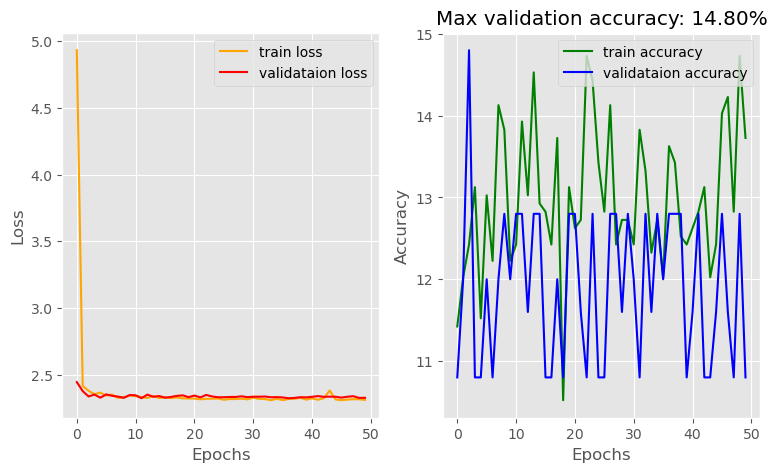

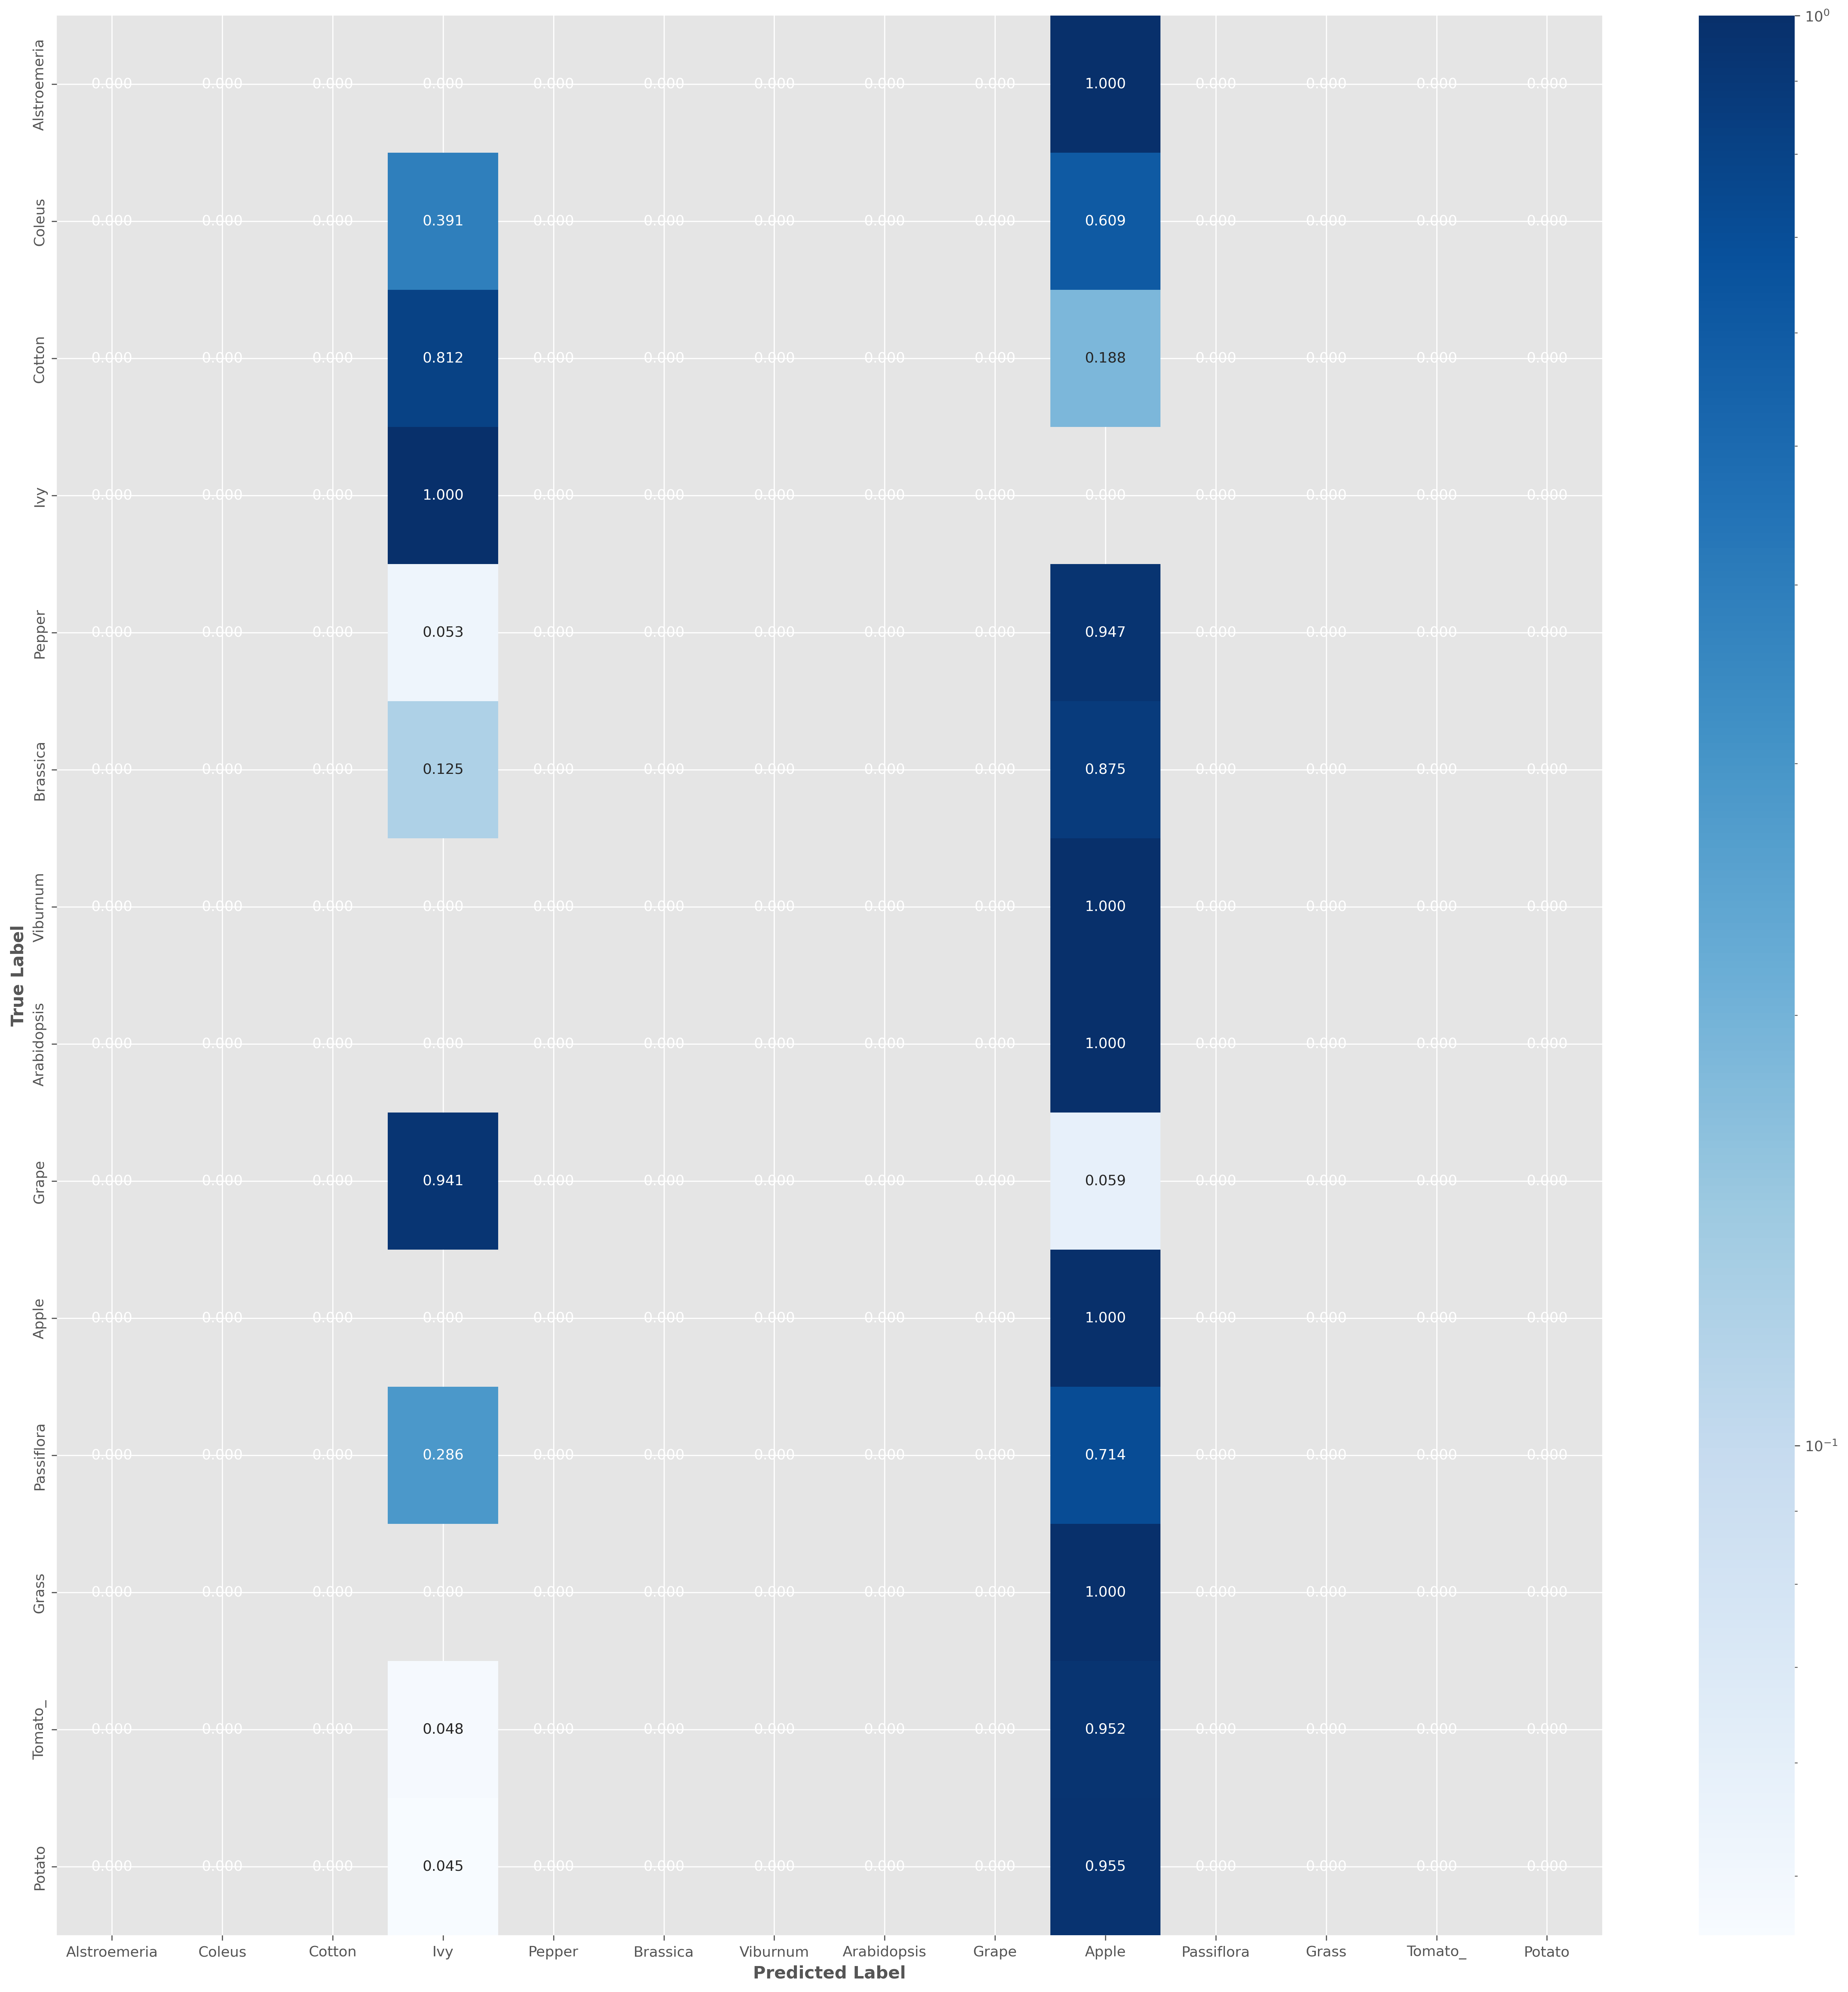

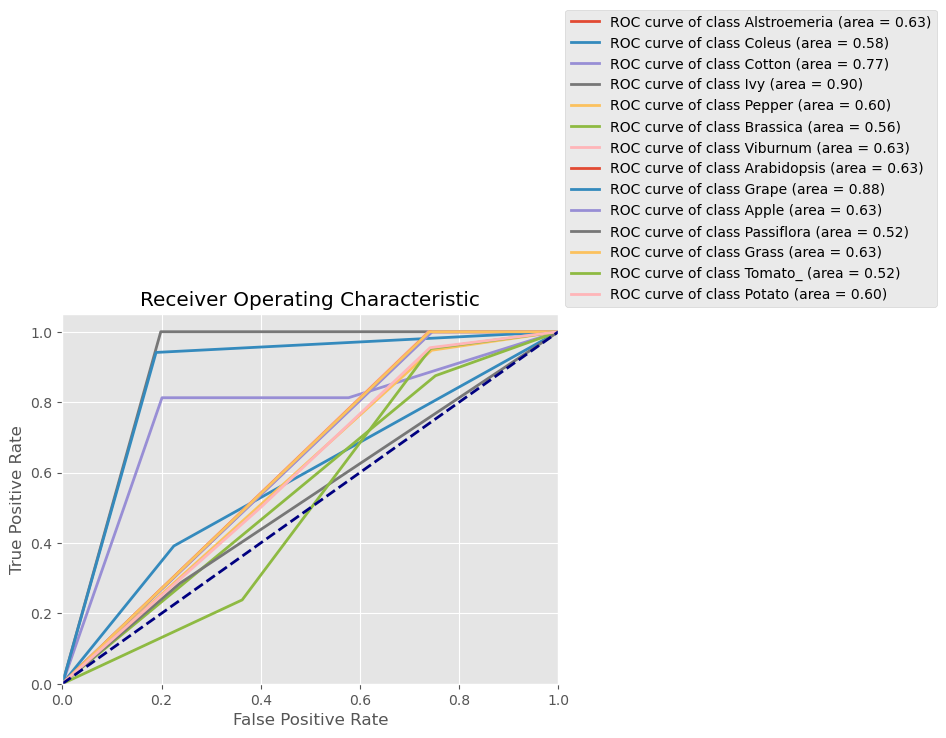

In [9]:
for i in 2** np.linspace(2,11,10):
    directions , thresholds = int(i), int(i)
    trained_model = ect_train_validate(
        num_dirs=directions,
        num_thresh=thresholds,
        input_path=class_items,
        output_ect_path=f'outputs/output_{directions}_{thresholds}/ect',
        output_model_path=f'outputs/output_{directions}_{thresholds}/best_model.pth',
        num_workers=num_workers,
        log_level='None'
    )
    save_model(
        epochs=trained_model["num_epochs"],
        model=trained_model["model"],
        optimizer=trained_model["optimizer"],
        criterion=trained_model["lossfcn"],
        output_model_path=f'outputs/output_{directions}_{thresholds}/best_model.pth',
    )
    loss, acc = plt.figure(figsize=(9,5)).subplots(1, 2)
    save_plots(
        train_acc= trained_model["train_acc"],
        valid_acc= trained_model["valid_acc"],
        train_loss= trained_model["train_loss"],
        valid_loss= trained_model["valid_loss"],
        loss=loss,
        accuracy=acc,
        accuracy_path=f'outputs/output_{directions}_{thresholds}/accuracy_loss.png',
        loss_path=f'outputs/output_{directions}_{thresholds}/accuracy_loss.png'
    )
    ax = plt.figure( figsize=(24,24), dpi=300 ).add_subplot(111)
    report_trained_model(
        num_dirs=directions,
        num_thresh=thresholds,
        train_dataset=trained_model["train_dataset"],
        train_loader=trained_model["train_loader"],
        test_loader=trained_model["test_loader"],
        test_dataset=trained_model["test_dataset"],
        ax=ax,
        model_path=f'outputs/output_{directions}_{thresholds}/best_model.pth',
        output_cf=f'outputs/output_{directions}_{thresholds}/confusion_matrix.png',
        output_report=f'outputs/output_{directions}_{thresholds}/accuracy.txt',
        log_level='None'
    )
    plot_roc_curve(
        model=trained_model["model"],
        test_loader=trained_model["test_loader"],
        test_dataset=trained_model["test_dataset"],
        output_path=f'outputs/output_{directions}_{thresholds}/roc_curve.png'
    )
    print(f"Completed training for {directions} directions and {thresholds} thresholds")

In [8]:
trained_model = ect_train_validate(
        num_dirs=num_dirs,
        num_thresh=num_thresh,
        input_path=class_items,
        output_ect_path=f'outputs/output_{num_dirs}_{num_thresh}/ect',
        output_model_path=f'outputs/output_{num_dirs}_{num_thresh}/best_model.pth',
        num_workers=num_workers,
        log_level='None'
    )

: 

In [1]:
from dataloaders import create_datasets
create_datasets("outputs/output_4_4/ect")

num_classes= 14
ECT data; using only normalize, rotation transforms on training data


(<dataloaders.NPYDataset at 0x14625a30c380>,
 <dataloaders.NPYDataset at 0x146258d67740>)